In [ ]:
pip install np_utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=0cd3f8e6a25ba857539d6a787f24eef21fb1c54e409e81054564921c86d33bf8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [ ]:
my_data = pd.read_csv('../content/A_Z Handwritten Data.csv').astype('float32')
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame.shape


(3352, 785)

In [ ]:
my_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 10.0 MB


In [ ]:
my_frame.describe()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,3352.0,3352.0,3352.0,3352.0,3352.0,3352.0,3352.0,3352.0,3352.0,3352.0,...,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.0,3351.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016413,0.000895,0.028648,0.068636,0.073113,0.058192,0.015219,0.000298,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.950113,0.051824,1.658380,3.938793,4.063198,3.351348,0.881014,0.017275,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.000000,3.000000,96.000000,228.000000,235.000000,194.000000,51.000000,1.000000,0.0,0.0


In [ ]:
my_frame.isnull().sum()


0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    1
0.645    1
0.646    1
0.647    1
0.648    1
Length: 785, dtype: int64

In [ ]:
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (2681, 28, 28)
Test Data Shape: (671, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

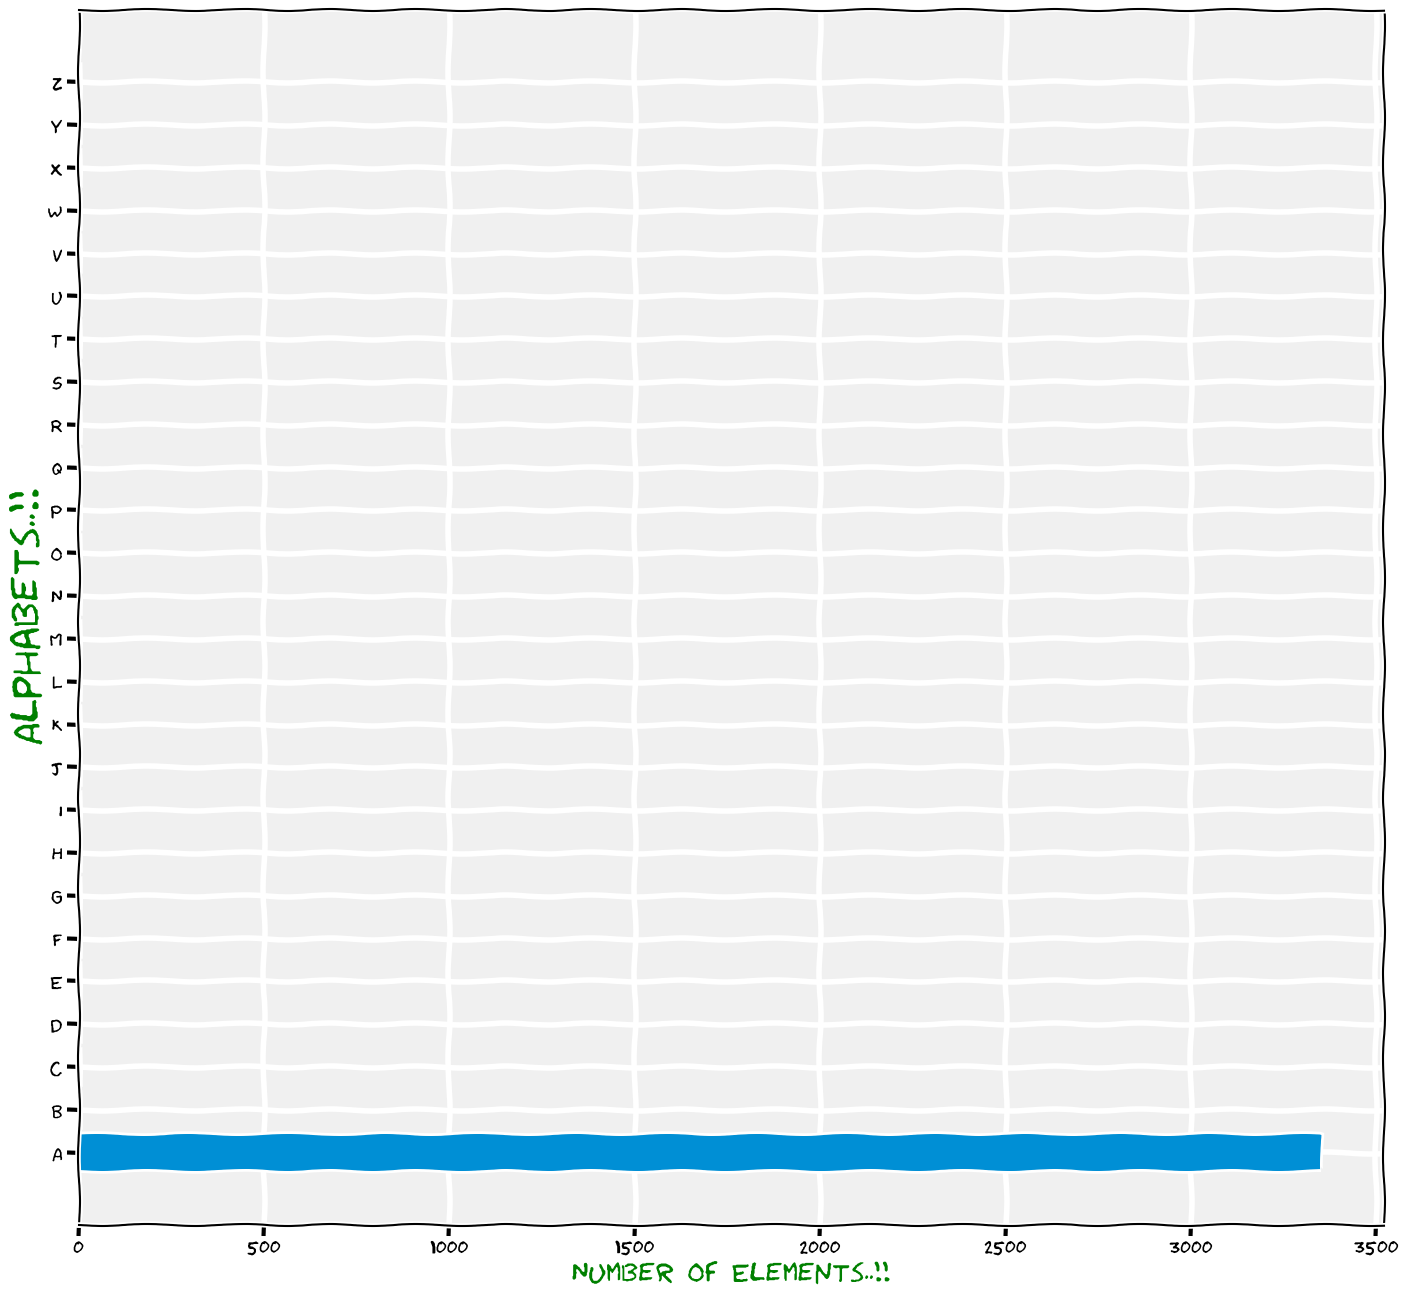

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1

alphabets = []

for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets..!!', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

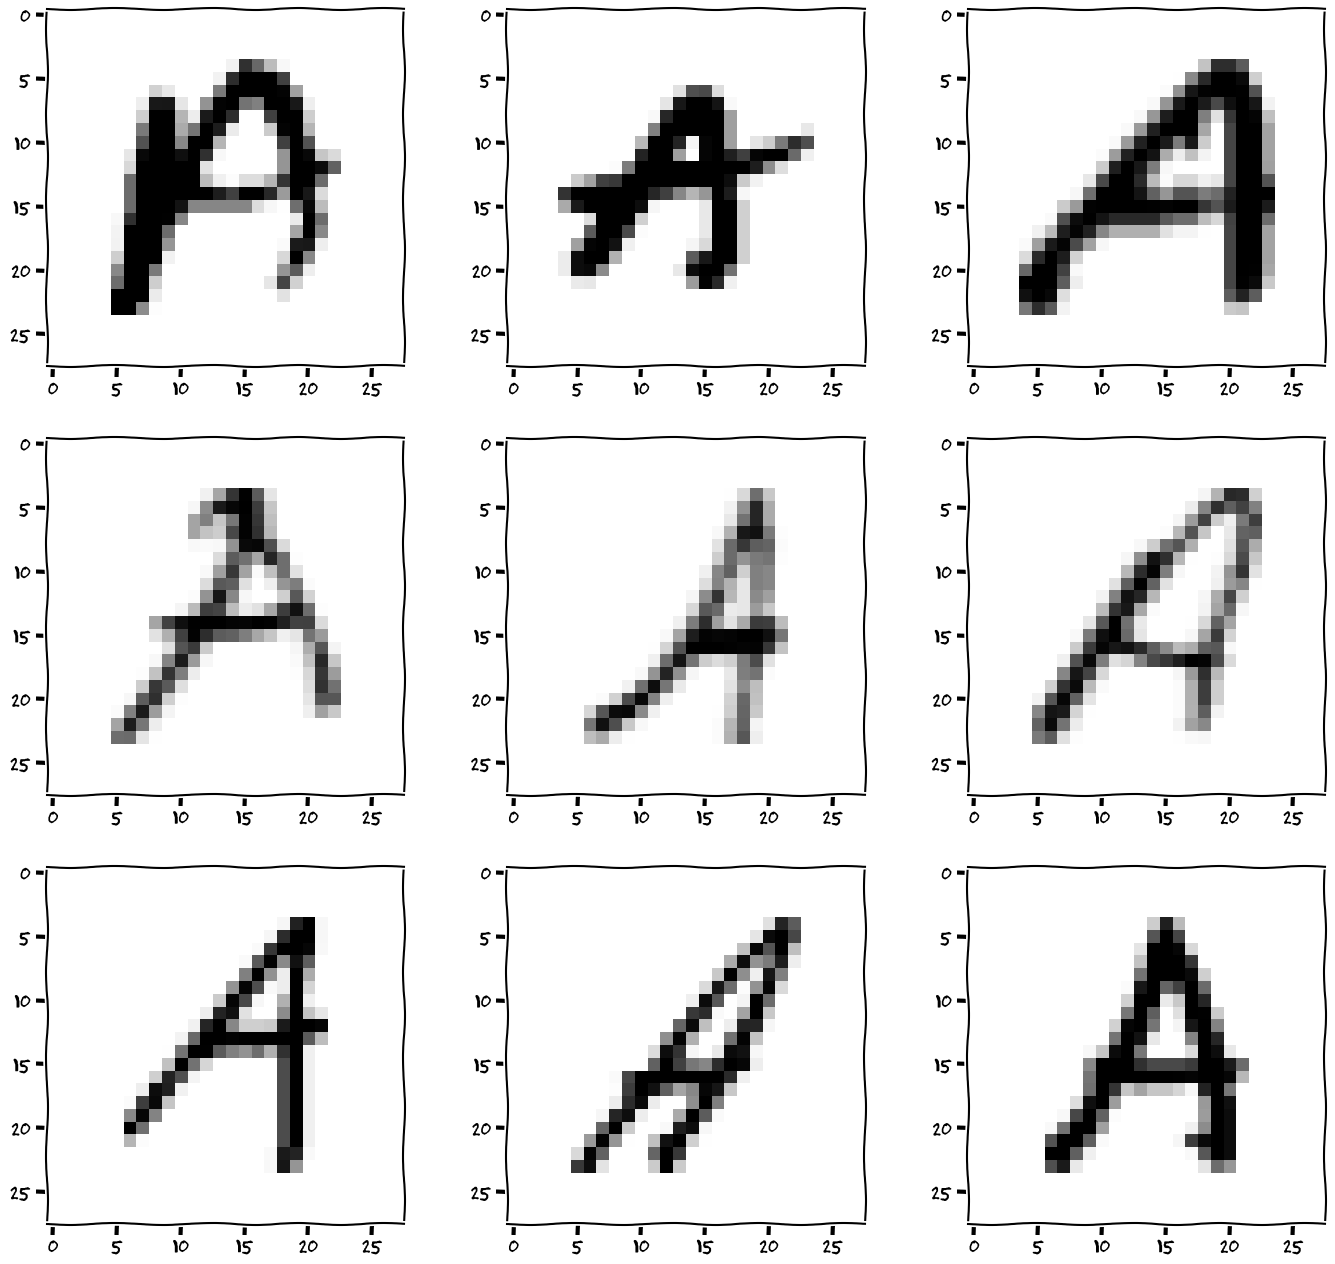

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (2681, 28, 28, 1)
New shape of test data: (671, 28, 28, 1)


In [ ]:
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (2681, 26)
New shape of test labels: (671, 26)


In [ ]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [ ]:
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 1, validation_data = (x_test, categorical_test))

Train on 2681 samples, validate on 671 samples
2681/2681 [==============================] - ETA: 0s - loss: nan - acc: 0.9881

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2681/2681 [==============================] - 3s 1ms/sample - loss: nan - acc: 0.9881 - val_loss: nan - val_acc: 1.0000


In [ ]:
my_model.summary()
my_model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


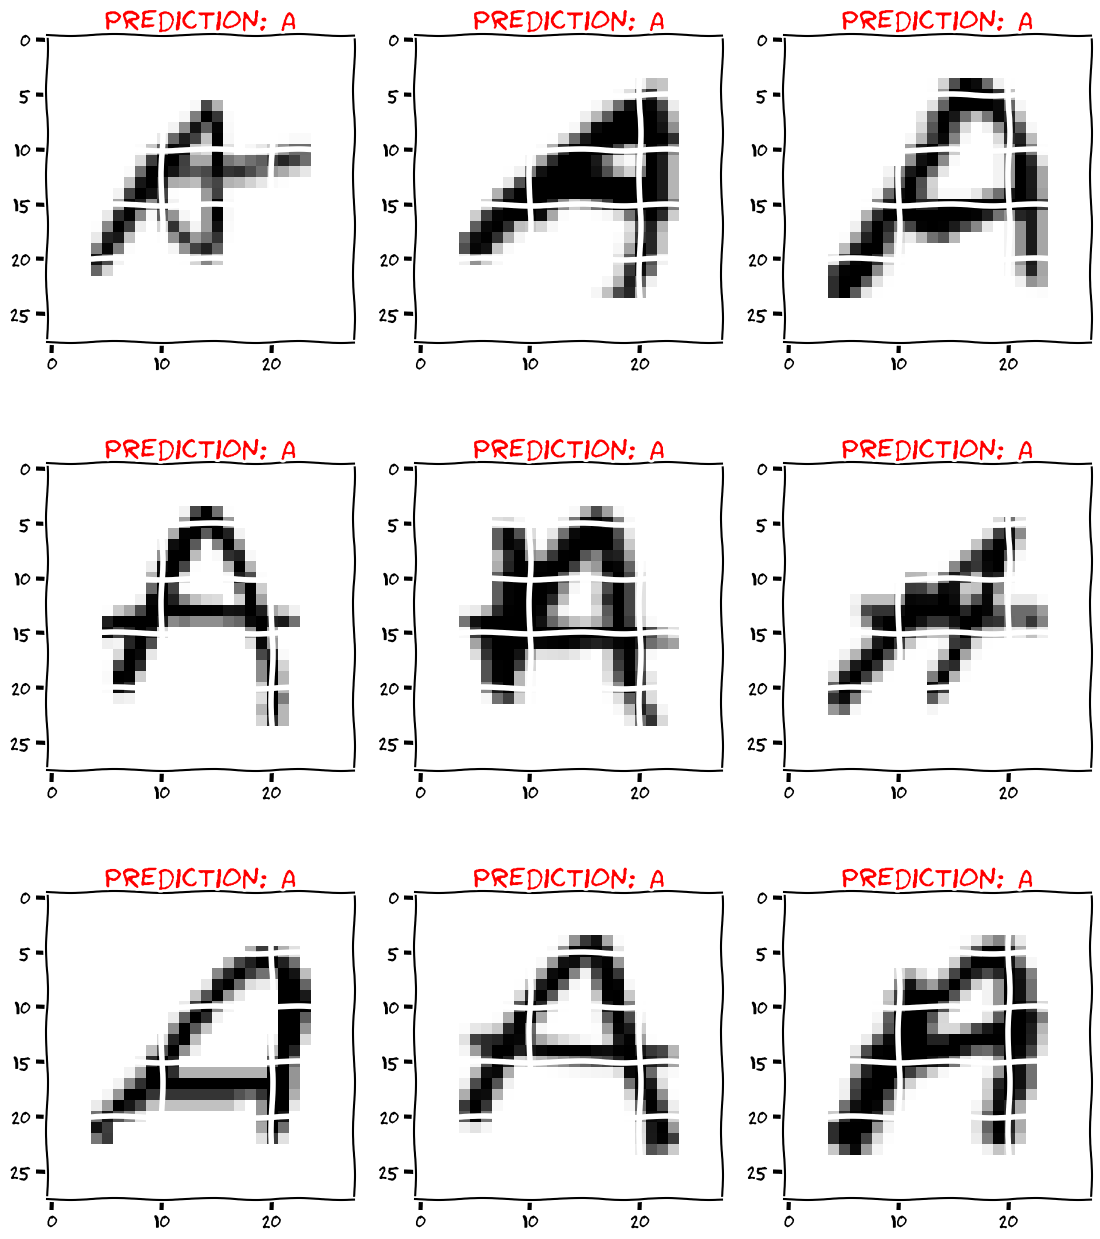

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')

    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()